<a href="https://colab.research.google.com/github/AndreassOlsson/Basic-AI-ML-exploration/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train an unsupervised learning model to classify Iris flowers

Utilize Kmeans clustering to differentiate between flower species in the famous iris dataset:


*   Load, analyse and prepare the data
*   Implement and visualize kmeans clustering



# Loading, analysing and preparing the data

## Loading and exploring the data

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(f'Dataset shape: {iris.data.shape}')
print(f'Feature Names: {iris.feature_names}')
print(f'Target Names: {iris.target_names}')

print('\nExamples:')
for _ in range(5):
  i = np.random.randint(iris.data.shape[0], size=1)[0]
  print(f'Index {i}: Features: {iris.data[i]}, Target: {iris.target[i]}')

Dataset shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

Examples:
Index 48: Features: [5.3 3.7 1.5 0.2], Target: 0
Index 57: Features: [4.9 2.4 3.3 1. ], Target: 1
Index 139: Features: [6.9 3.1 5.4 2.1], Target: 2
Index 100: Features: [6.3 3.3 6.  2.5], Target: 2
Index 132: Features: [6.4 2.8 5.6 2.2], Target: 2


In [ ]:
# Map target to target names
species_dict = dict(zip(range(0, len(iris.target_names)), iris.target_names))
iris_species = list((map(lambda x : species_dict[x], iris.target)))

In [ ]:
# Create pd dataframe for features(x) and targets(y)
x = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['targets'])

The two features that separates the flowers are their sepal and their petal. We have data of the features respective lengths and widths, which will be used to differentiate between the flowers.

## Visualize raw data

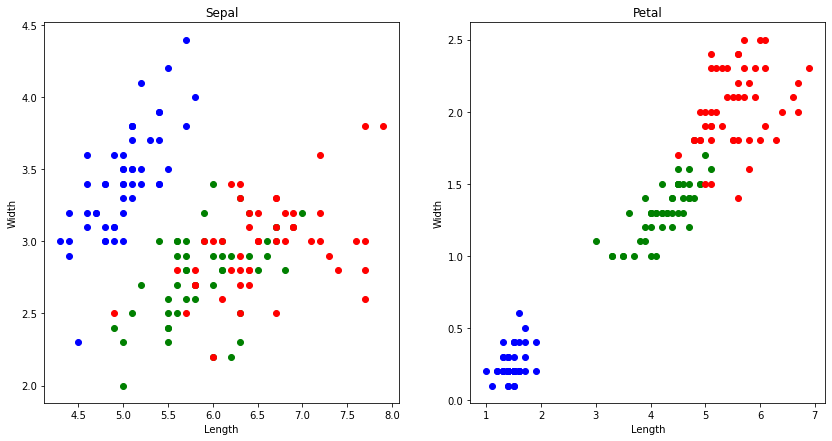

In [ ]:
plt.figure(figsize=(14,7))

color_dict = {
    0:'b', 1:'g',2:'r'
}

# Plot sepal
plt.subplot(1, 2, 1) 
plt.title('Sepal')

for i, row in x.iterrows():
  color = color_dict[y.targets.iloc[i]]
  plt.scatter(row['sepal_length'], row['sepal_width'], c=color)

plt.xlabel('Length')
plt.ylabel('Width')


# Plot Petal
plt.subplot(1, 2, 2) 
plt.title('Petal')

for i, row in x.iterrows():
  color = color_dict[y.targets.iloc[i]]
  plt.scatter(row['petal_length'], row['petal_width'], c=color)
  
plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

## Instantiate PCA (Principal Component Analysis)

The iris dataset is 4-dimensional but its intrinsic dimensions, meaning the dimensions required to approximate the dataset, may be smaller. To find out what features are important, we need to plot the variances of the PCA features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(x)

pca = PCA()
pca.fit(X_norm)

PCA()

In [ ]:
# Plot the PCA explained variances
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

NameError: ignored

We can see that only two features have a meaningful variance. Therefor we will use PCA for dimensionality reduction by creating a new PCA instance with n_components=2

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_norm)
pca_features = pca.transform(X_norm)

In [ ]:
pca_features.shape

(150, 2)

## Visualize normalized and dimensionality reduced data

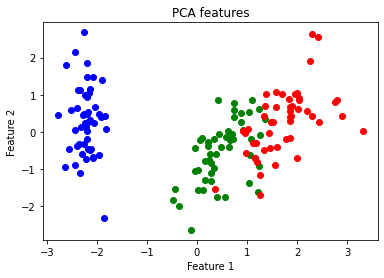

In [ ]:
color_dict = {
    0:'b', 1:'g',2:'r'
}

for i in range(pca_features.shape[0]):
  color = color_dict[y.targets.iloc[i]]
  plt.scatter(pca_features[i,0], pca_features[i,1], c=color)

plt.title('PCA features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Implementing and visualizing kmeans clustering

Kmeans clustering is an unsupervised learning technique that automatically groups data into coherent clusters

It works by:


1.   Randomly initialize K cluster centroids
2.   While the clusters position is not unchanged:
  1. For each data point, say x, find the cluster centroid closest to x.
  2. Update cluster centers using data points assigned to them (Calculate the mean)


In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
predicted_labels = model.fit_predict(pca_features)
print(f'Model inertia: {model.inertia_} (lower is better)')

Model inertia: 115.02075663594002 (lower is better)


In [ ]:
df = pd.DataFrame({'predicted':predicted_labels, 'species':iris_species})
ct = pd.crosstab(df['predicted'], df['species'])
print(ct, '\n')
print(species_dict)

species    setosa  versicolor  virginica
predicted                               
0               0          39         14
1              50           0          0
2               0          11         36 

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


## Visualizing silhouette score

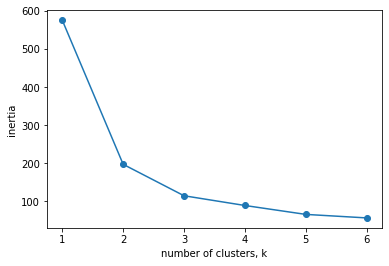

In [ ]:
k_values = range(1,7)
all_inertias = []

for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(pca_features)
  all_inertias.append(model.inertia_)

plt.plot(k_values, all_inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show()

Even though lower inertia is better, inertia alone is not sufficient for choosing number of clusters (k). In this case we know that there are three separate species, hence n_clusters=3 is optimal in this case.